Title : Data Analytics II (Logistic Regression)

1. Implement logistic regression using Python 
/R to perform classification on 
Social_Network_Ads.csv dataset. 
2. ComputeConfusionmatrixtofindTP,FP,TN,FN,Accura
 cy, Errorrate, Precision,Recall on the given dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
# Load the data
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# Shape = no of rows, no of columns
df.shape

(400, 5)

In [6]:
# Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [8]:
# check if there is null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
# Drop the User ID column
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [12]:
# Column names
df.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

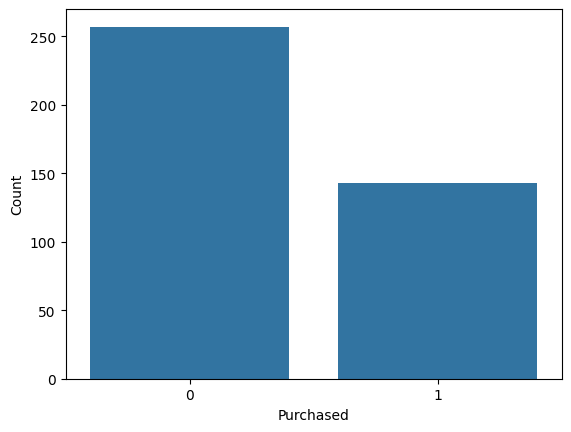

In [18]:
sns.countplot(data=df, x=df['Purchased'])
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

In [20]:
# Split the data
X = df.drop(columns=['User ID','Purchased'])
Y = df['Purchased']

In [21]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
# Train the model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [24]:
# Make Predictions
y_pred = model.predict(x_test_scaled)

In [26]:
# Evaluate the model
cm=confusion_matrix(y_test, y_pred)
print(cm)
TN, FP, FN, TP = cm.ravel()
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

[[56  2]
 [ 5 17]]
True Positives: 17
True Negatives: 56
False Positives: 2
False Negatives: 5


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [27]:
# Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
error_rate = 1- accuracy

print("Accuracy: ",accuracy)
print("Error Rate: ", error_rate)

Accuracy:  0.9125
Error Rate:  0.08750000000000002


In [28]:
# Precision
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = ( 2 * recall * precision ) / ( precision + recall )
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.8947368421052632
Recall:  0.7727272727272727
F1 Score:  0.8292682926829269


In [29]:
# Calculate the accuracy, error, and precision
accuracy=accuracy_score(y_test, y_pred)
error=1-accuracy
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred, average='binary')

print('Accuracy:', accuracy)
print('Error:', error)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.9125
Error: 0.08750000000000002
Precision: 0.8947368421052632
Recall: 0.7727272727272727


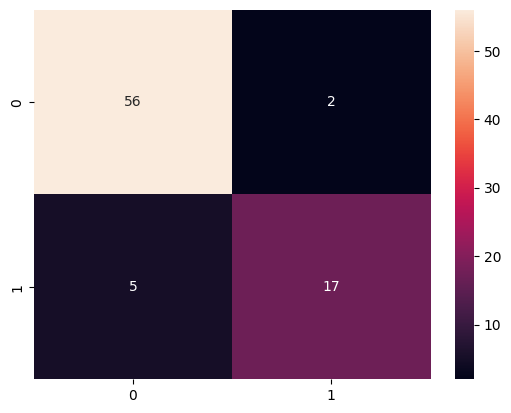

In [35]:
# Plot the confusion matrix
sns.heatmap(cm,annot=True)
plt.show()